# Optical Character Recognition 👀💻


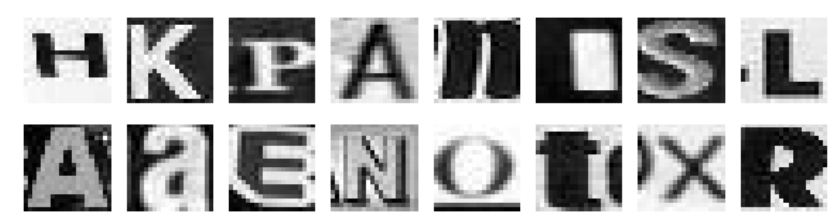16 random images sampled from the modified version of the Chars74K dataset

### Set of sanity checks
1. Count up the number of images
2. Print out one of the images to see that the intensity values lie in the 8-bit, or unormalised, range
3. Visualize a couple of images using a plotting library

### Look into:
* Manually cropping, or otherwise removing parts of the image that are uninteresting.
*  Feature scaling, such as ensuring that features (i) reside in the 0 to 1 range, have (ii) zero mean, and (iii) unit variance
* Dimensionality reduction, such as projecting high dimensional data to the top n principal components, using principal component analysis (PCA) [3, 4]. Other alternatives include, for example, summarisation with clustering (e.g. K-means) and learnable data encodings with autoencoders
[5, 6, 7].
* Digital image processing techniques, such as noise removal or edge detection filters.
* Feature descriptors, such as the scale-invariant feature transform (SIFT) [8, 9], histogram of oriented gradients (HOG) [10], and local binary patterns (LBP) [11]. These are algorithms that create feature vectors with good properties.

### Machine Learning Models that can be used:
* Logistic Regression
* **SVM** <--
* kNN
* DTL
* Naive Bayes
* **ANN** <--
* Ensemble approaches

## Feature Engineering

In [0]:
!git clone https://github.com/wQuole/TDT4173.git

Cloning into 'TDT4173'...
remote: Enumerating objects: 7207, done.
remote: Counting objects: 100% (7207/7207), done.
remote: Compressing objects: 100% (515/515), done.
remote: Total 7207 (delta 6700), reused 7194 (delta 6690), pack-reused 0
Receiving objects: 100% (7207/7207), 3.41 MiB | 27.97 MiB/s, done.
Resolving deltas: 100% (6700/6700), done.


In [0]:
import numpy as np
import pandas as pd
import os
import glob
from keras.preprocessing import image
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [0]:
def load_data(filePath):
    images = []
    for folder in os.listdir(filePath):
      for filename in os.listdir(filePath+"/"+folder):
        if filename.endswith(".jpg"):
          img = image.load_img(filePath+"/"+folder+"/"+filename, target_size=(20,20,1), grayscale=True)
          if img is not None:
            images.append(img)
    return images

### Load the Chars74K-Lite Dataset

In [87]:
chars74k_lite = os.path.abspath('/content/TDT4173/Assignment 5 - Optical Character Recognition/dataset/chars74k-lite/')
imgs = load_data(chars74k_lite)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [0]:
def preprocess_data(dataset):
  df = pd.DataFrame()
  prepped = []
  for img in dataset:
    img = image.img_to_array(img)
    img = img/255
    df = df.append(pd.Series(img.ravel()), ignore_index=True)
  return df

### Preprocess the data
* normalize pixelvalues from `range(0, 255)` to `range(0,1)`
* flatten the _images_ in the shape of`(20, 20, 1)` to `(400,1)`
* Transform list containing `PIL.JpegImagePlugin.JpegImageFile` to a `pd.DataFrame` containing columns (`pd.Series`) of `float32`.

After preprocessing we will have a Matrix containing 7112 images in the form of rows with 400 pixel values representing to which degree it is lit 🔥

In [0]:
prepped_data = preprocess_data(imgs)

In [91]:
prepped_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,0.196078,0.125490,0.188235,0.090196,0.180392,0.145098,0.176471,0.164706,0.176471,0.145098,0.188235,0.098039,0.207843,0.164706,0.066667,0.168627,0.176471,0.129412,0.141176,0.184314,0.109804,0.215686,0.188235,0.188235,0.133333,0.172549,0.188235,0.152941,0.125490,0.200000,0.215686,0.188235,0.149020,0.168627,0.117647,0.145098,0.105882,0.176471,0.129412,0.133333,...,0.160784,0.172549,0.160784,0.196078,0.152941,0.141176,0.227451,0.192157,0.239216,0.141176,0.152941,0.164706,0.168627,0.192157,0.176471,0.219608,0.231373,0.082353,0.196078,0.192157,0.168627,0.149020,0.160784,0.172549,0.188235,0.172549,0.141176,0.180392,0.141176,0.168627,0.196078,0.156863,0.172549,0.152941,0.086275,0.156863,0.152941,0.149020,0.156863,0.160784
1,0.250980,0.203922,0.305882,0.258824,0.262745,0.286275,0.325490,0.301961,0.329412,0.274510,0.278431,0.266667,0.298039,0.301961,0.247059,0.313726,0.290196,0.290196,0.294118,0.290196,0.215686,0.254902,0.333333,0.294118,0.317647,0.301961,0.270588,0.321569,0.313726,0.309804,0.325490,0.301961,0.266667,0.254902,0.262745,0.313726,0.305882,0.392157,0.403922,0.309804,...,0.054902,0.152941,0.243137,0.200000,0.682353,0.788235,0.764706,0.741176,0.200000,0.039216,0.588235,0.729412,0.729412,0.819608,0.450980,0.000000,0.015686,0.070588,0.133333,0.168627,0.172549,0.176471,0.219608,0.184314,0.235294,0.490196,0.403922,0.125490,0.000000,0.054902,0.474510,0.658824,0.749020,0.643137,0.066667,0.015686,0.015686,0.086275,0.160784,0.184314
2,0.141176,0.188235,0.180392,0.152941,0.168627,0.141176,0.156863,0.172549,0.184314,0.254902,0.250980,0.141176,0.274510,0.188235,0.070588,0.211765,0.243137,0.250980,0.239216,0.188235,0.200000,0.192157,0.250980,0.380392,0.427451,0.223529,0.149020,0.160784,0.262745,0.305882,0.254902,0.247059,0.117647,0.211765,0.180392,0.160784,0.356863,0.360784,0.294118,0.176471,...,0.184314,0.156863,0.007843,0.000000,0.972549,0.925490,0.619608,0.588235,0.627451,0.878431,0.258824,0.360784,0.878431,0.729412,0.694118,0.709804,0.768627,0.725490,0.650980,0.192157,0.105882,0.094118,0.149020,0.458824,0.250980,0.807843,0.843137,0.874510,0.513726,0.137255,0.078431,0.180392,0.133333,0.439216,0.854902,0.780392,0.717647,0.290196,0.149020,0.062745
3,0.866667,0.839216,0.874510,0.850980,0.850980,0.925490,0.843137,0.854902,0.858824,0.886275,0.843137,0.854902,0.823529,0.890196,0.870588,0.874510,0.898039,0.827451,0.913725,0.874510,0.858824,0.882353,0.854902,0.866667,0.792157,0.835294,0.823529,0.870588,0.843137,0.917647,0.858824,0.870588,0.815686,0.792157,0.854902,0.862745,0.866667,0.815686,0.792157,0.886275,...,0.831373,0.854902,0.870588,0.886275,0.972549,0.458824,0.133333,0.000000,0.160784,0.862745,0.850980,0.796078,0.921569,0.607843,0.062745,0.047059,0.066667,0.560784,0.639216,0.850980,0.854902,0.858824,0.843137,0.796078,0.917647,0.800000,0.694118,0.729412,0.709804,0.894118,0.792157,0.788235,0.835294,0.850980,0.643137,0.745098,0.588235,0.886275,0.760784,0.917647
4,0.882353,1.000000,0.917647,0.960784,0.949020,0.921569,0.886275,0.886275,0.866667,0.894118,0.925490,0.898039,0.898039,0.815686,0.850980,0.874510,0.909804,0.882353,0.901961,0.901961,0.917647,0.184314,0.082353,0.121569,0.078431,0.968627,0.764706,0.909804,0.960784,0.239216,0.137255,0.105882,0.243137,0.909804,0.898039,0.878431,0.250980,0.231373,0.211765,0.074510,...,0.890196,0.827451,0.862745,0.921569,0.352941,0.243137,0.223529,0.239216,0.176471,0.819608,0.866667,0.909804,0.462745,0.223529,0.243137,0.219608,0.247059,0.698039,0.882353,0.545098,0.882353,0.831373,0.854902,0.874510,0.415686,0.137255,0.105882,0.145098,0.054902,0.917647,0.827451,0.874510,0.549020,0.117647,0.094118,0.074510,0.082353,0.776471,0.937255,0.231373


In [92]:
prepped_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
7107,0.286275,0.258824,0.290196,0.572549,0.149020,0.278431,0.109804,0.917647,0.168627,0.258824,0.207843,0.643137,0.658824,0.921569,0.921569,0.925490,0.898039,0.847059,0.870588,0.882353,0.874510,0.882353,0.929412,0.831373,0.921569,0.937255,0.850980,0.984314,0.901961,0.882353,0.921569,0.941176,0.874510,0.835294,0.941176,0.847059,0.858824,0.850980,0.815686,0.925490,...,0.945098,0.909804,0.917647,0.921569,0.882353,0.862745,0.823529,0.733333,0.854902,0.733333,0.439216,0.819608,0.894118,0.882353,0.980392,0.890196,0.913725,0.909804,0.901961,0.894118,0.898039,0.901961,0.905882,0.917647,0.929412,0.905882,0.886275,0.901961,0.894118,0.968627,0.921569,0.909804,0.901961,0.921569,0.929412,0.886275,0.909804,0.909804,0.909804,0.909804
7108,0.043137,0.015686,0.023529,0.039216,0.000000,0.000000,0.027451,0.000000,0.000000,0.003922,0.043137,0.050980,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.027451,0.003922,0.000000,0.019608,0.007843,0.000000,0.011765,0.031373,0.000000,0.035294,0.019608,0.019608,0.000000,0.000000,0.066667,0.054902,0.035294,0.000000,0.000000,0.047059,0.047059,0.000000,...,0.023529,0.000000,0.000000,0.007843,0.011765,0.000000,0.000000,0.000000,0.054902,0.039216,0.015686,0.047059,0.000000,0.027451,0.000000,0.000000,0.003922,0.003922,0.003922,0.003922,0.015686,0.000000,0.000000,0.007843,0.019608,0.007843,0.000000,0.000000,0.000000,0.003922,0.007843,0.062745,0.011765,0.023529,0.000000,0.050980,0.003922,0.003922,0.003922,0.003922
7109,0.968627,1.000000,0.960784,1.000000,0.984314,1.000000,0.976471,0.984314,1.000000,0.925490,1.000000,1.000000,0.933333,0.980392,1.000000,1.000000,1.000000,0.952941,1.000000,0.992157,0.992157,0.996078,1.000000,1.000000,1.000000,0.992157,0.980392,1.000000,0.952941,1.000000,0.827451,0.678431,1.000000,1.000000,0.976471,1.000000,0.984314,1.000000,0.937255,0.960784,...,1.000000,1.000000,1.000000,1.000000,0.996078,0.992157,0.992157,0.992157,1.000000,0.941176,0.996078,0.988235,0.905882,1.000000,0.984314,1.000000,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.992157,0.976471,1.000000,0.929412,1.000000,0.976471,0.976471,1.000000,0.952941,1.000000,1.000000,1.000000,1.000000
7110,0.043137,0.058824,0.023529,0.098039,0.090196,0.035294,0.125490,0.145098,0.254902,0.345098,0.419608,0.552941,0.647059,0.682353,0.733333,0.709804,0.631373,0.525490,0.474510,0.478431,0.270588,0.168627,0.062745,0.078431,0.031373,0.035294,0.152941,0.113725,0.262745,0.345098,0.368627,0.458824,0.580392,0.647059,0.611765,0.450980,0.388235,0.388235,0.392157,0.368627,...,0.274510,0.176471,0.200000,0.580392,0.933333,0.247059,0.023529,0.098039,0.156863,0.309804,0.701961,0.333333,0.474510,0.376471,0.109804,0.003922,0.168627,0.690196,0.800000,0.298039,0.796078,0.647059,0.568627,0.713726,0.949020,0.384314,0.203922,0.176471,0.196078,0.470588,0.811765,0.349020,0.792157,0.317647,0.172549,0.176471,0.168627,0.596078,0.607843,0.000000
7111,0.901961,0.913725,0.988235,0.945098,0.890196,0.960784,0.952941,0.854902,0.984314,0.866667,0.913725,0.941176,0.886275,0.917647,0.941176,0.905882,0.956863,0.866667,0.964706,0.894118,0.933333,0.937255,0.878431,0.890196,0.968627,0.890196,0.819608,0.964706,0.874510,0.870588,0.964706,1.000000,0.964706,0.925490,0.921569,0.929412,0.921569,0.890196,0.949020,0.937255,...,0.682353,0.662745,0.662745,0.701961,0.745098,0.694118,0.525490,0.364706,0.243137,0.462745,0.568627,0.474510,0.364706,0.349020,0.450980,0.596078,0.717647,0.717647,0.694118,0.764706,0.674510,0.650980,0.623529,0.627451,0.682353,0.721569,0.694118,0.631373,0.690196,0.600000,0.572549,0.627451,0.650980,0.603922,0.509804,0.431373,0.466667,0.482353,0.670588,0.741176
